In [ ]:
%cd /content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master

/content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master


In [ ]:
!pip install -r /content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master/requirements.txt


     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f3403abfa477135a7059ad31b9e81458c11c605cc156813862298d41a8a51325
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
  Created wheel for face-alignment: filename=face_alignment-1.3.5-py2.py3-none-any.whl size=28239 sha256=666164b5947c695661f115b9fbfb91a0ac7614825967de463f13d29ce6f36ff4
  Stored in directory: /root/.cache/pip/wheels/c9/ba/4d/2d368f55e5f929f9472da59e356fbdf1483f885de80a5bc620
Successfully built face-recognition-models face-alignment


In [ ]:
import os 
import sys
from tqdm import tqdm
import numpy as np
import cv2
import random
from create_mask.mask import create_mask


mask_list = []

default_path = os.path.join(os.getcwd(),"mask/mask.png")
white_path = os.path.join(os.getcwd(),"mask/white.png")
blue_path = os.path.join(os.getcwd(),"mask/blue.png")
black_path = os.path.join(os.getcwd(),"mask/black.png")

mask_list.append(default_path)
mask_list.append(white_path)
mask_list.append(blue_path)
mask_list.append(black_path)

# print(mask_list)

dataset_path = 'dataset'

if not os.path.exists('dataset_with_mask'):
        os.mkdir('dataset_with_mask')
        
        
for i in os.listdir(dataset_path):
    if not os.path.exists(f'dataset_with_mask/{i}'):
        os.mkdir(f'dataset_with_mask/{i}')
        
        
imagePaths = []


for i in os.listdir(dataset_path):
    for j in os.listdir(f'{dataset_path}/{i}'):
        imagePaths.append(f'{dataset_path}/{i}/{j}')
        
for i in tqdm(imagePaths,total=len(imagePaths)):
    mask_path = random.choice(mask_list)
    create_mask(i,mask_path)

imagePaths = []

for i in os.listdir("dataset_with_mask"):
    for j in os.listdir(f'dataset_with_mask/{i}'):
        imagePaths.append(f'dataset_with_mask/{i}/{j}')


print('MaskAppending Done')
print("extract_faces")

protoPath = "face_detection_model/deploy.prototxt"
modelPath = "face_detection_model/res10_300x300_ssd_iter_140000.caffemodel"
detector = cv2.dnn.readNetFromCaffe(protoPath, modelPath)


for (i,imagePath) in tqdm(enumerate(imagePaths),total=len(imagePaths)):
    # print(imagePath)
    face_path = imagePath.replace('dataset_with_mask','dataset')
    # print(face_path)
    image = cv2.imread(imagePath)

    face_image = cv2.imread(face_path)
    (h,w) = image.shape[:2]

    imageBlob = cv2.dnn.blobFromImage(cv2.resize(face_image,(300,300)),1.0,(300,300),(104.0,177.0,123.0),swapRB=False,crop=False)


    detector.setInput(imageBlob)
    detections = detector.forward()
    # write_path = imagePath.replace('dataset_with_mask','dataset_with_mask_face')

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])
        confidence = detections[0,0,i,2]

        if confidence > 0.5:

            box = detections[0,0,i,3:7] * np.array([w,h,w,h])
            (startX,startY,endX,endY) = box.astype("int")

            face = image[startY:endY,startX:endX]
            try:
                face = cv2.resize(face,(224,224))
                cv2.imwrite(imagePath,face)
            except:
                print(f"Some error occured in {imagePath}")
                os.remove(imagePath)
        else:
            os.remove(imagePath)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.223555,3.707055,0.882979,0.117021,00:30
1,2.706374,1.946130,0.691489,0.308511,00:05
2,2.099690,1.167814,0.468085,0.531915,00:04
3,1.656947,0.827540,0.276596,0.723404,00:03
4,1.347180,0.683111,0.234043,0.765957,00:04
5,1.150389,0.640827,0.223404,0.776596,00:04


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


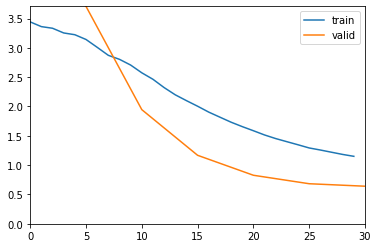

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


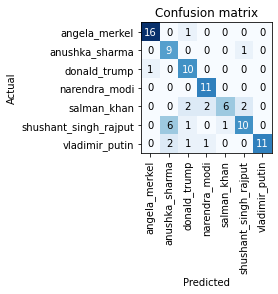

In [ ]:
import torch
import os
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


torch.device('cuda')
torch.cuda.empty_cache()

dataset_path = 'dataset_with_mask'
np.random.seed(42)
trfm = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.2, max_rotate=20.0, max_lighting=0.4)

data = ImageDataBunch.from_folder(dataset_path,train='.',valid_pct =0.2,num_workers = 4).normalize(imagenet_stats)
# ,ds_tfms = trfm

learn = cnn_learner(data,models.resnet34,metrics = [error_rate,accuracy],callback_fns=ShowGraph)

learn.fit_one_cycle(6, max_lr =[1e-6, 1e-4, 1e-3])
learn.save('stage-1') 

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
learn.export()


  0%|          | 0/5 [00:00<?, ?it/s]Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

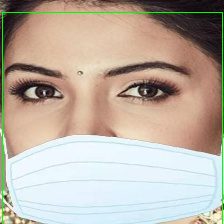

 20%|██        | 1/5 [00:18<01:13, 18.43s/it]/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:135: UserWarning: An output with one or more elements was resized since it had shape [165], which does not match the required output shape [142].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /pytorch/aten/src/ATen/native/Resize.cpp:23.)
  torch.index_select(x1, 0, idx, out=xx1)
/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:136: UserWarning: An output with one or more elements was resized since it had shape [165], which does not match the required output shape [142].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. Y

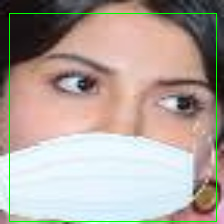

 40%|████      | 2/5 [00:23<00:31, 10.35s/it]/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:135: UserWarning: An output with one or more elements was resized since it had shape [22], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /pytorch/aten/src/ATen/native/Resize.cpp:23.)
  torch.index_select(x1, 0, idx, out=xx1)
/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:136: UserWarning: An output with one or more elements was resized since it had shape [22], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can

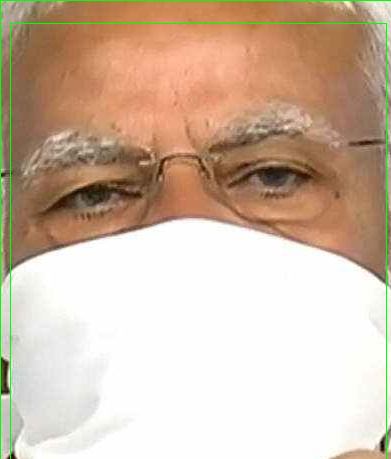

 60%|██████    | 3/5 [00:33<00:20, 10.19s/it]/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:135: UserWarning: An output with one or more elements was resized since it had shape [24], which does not match the required output shape [3].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /pytorch/aten/src/ATen/native/Resize.cpp:23.)
  torch.index_select(x1, 0, idx, out=xx1)
/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:136: UserWarning: An output with one or more elements was resized since it had shape [24], which does not match the required output shape [3].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can

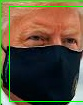

 80%|████████  | 4/5 [00:41<00:09,  9.58s/it]/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:135: UserWarning: An output with one or more elements was resized since it had shape [18], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /pytorch/aten/src/ATen/native/Resize.cpp:23.)
  torch.index_select(x1, 0, idx, out=xx1)
/content/drive/My Drive/Face-recognition-in-presence-of-Mask-master/face_detection/layers/detection.py:136: UserWarning: An output with one or more elements was resized since it had shape [18], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can

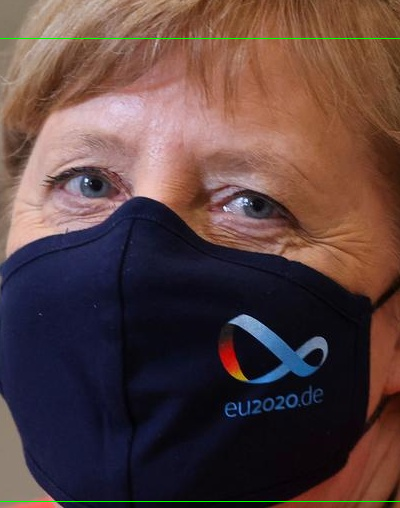

100%|██████████| 5/5 [00:45<00:00,  9.14s/it]


In [ ]:
import os 
import cv2
import numpy as np
from tqdm import tqdm
from utils import face_detection
from google.colab.patches import cv2_imshow
test_data_path = "/content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master/test_data1"

imagePaths = []

for i in os.listdir(test_data_path):
    imagePaths.append(f"{test_data_path}/{i}")

for (i,imagePath) in tqdm(enumerate(imagePaths),total=len(imagePaths)):
    image = cv2.imread(imagePath)
    bbox = face_detection(imagePath)
    startX,startY,endX,endY = bbox.astype('int')
    face = image[startY:endY,startX:endX]
    cv2.rectangle(image,(startX,startY),(endX,endY),(0,255,0),1)
    cv2_imshow(image)
    cv2.waitKey(0)




anushka_sharma


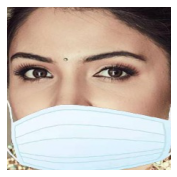

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from fastai import *
from fastai.vision import *
import torch
from PIL import Image
import pickle

learn = load_learner("/content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master/dataset_with_mask")
classNames = ['angela_markel','anushka_sharma','donald_trump','narendra_modi',"salman_khan",'shushant_singh_rajput',"valdimir_putin"]
classNames.append(i)

img = open_image('/content/drive/MyDrive/Face-recognition-in-presence-of-Mask-master/test_data1/asdasd.jpg')

img.show(figsize=(3, 3))
print("\n")
pred_class,preds_idx,outputs = learn.predict(img)

print(pred_class)

